In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the log from get_head
log_ = pd.read_csv('log_get_head3.csv',sep=';') # load the ;-separated log 

In [3]:
# inspect data
log_.head()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error
0,0,urls_get,requests,1.598367e+09,-0.131505,https://ekstrabladet.dk/flash/filmogtv/helt-ny...,https://ekstrabladet.dk/flash/filmogtv/helt-ny...,565319,200,True,NaN
1,1,urls_get,requests,1.598367e+09,-0.086136,https://ekstrabladet.dk/nyheder/erhvervsnyhede...,https://ekstrabladet.dk/nyheder/erhvervsnyhede...,566018,200,True,NaN
2,2,urls_get,requests,1.598367e+09,-0.056548,https://ekstrabladet.dk/sport/fodbold/landshol...,https://ekstrabladet.dk/sport/fodbold/landshol...,573745,200,True,NaN
3,3,urls_get,requests,1.598367e+09,-0.059775,https://ekstrabladet.dk/nyheder/samfund/corona...,https://ekstrabladet.dk/nyheder/samfund/corona...,566336,200,True,NaN
4,4,urls_get,requests,1.598367e+09,-0.050224,https://ekstrabladet.dk/ferie/tokyo-faar-genne...,https://ekstrabladet.dk/ferie/tokyo-faar-genne...,565156,200,True,NaN


In [4]:
log_['dt'] = pd.to_datetime(log_.t,unit='s')
dt = log_.dt.values[0]

Text(0.5, 0, 'Scraping progress')

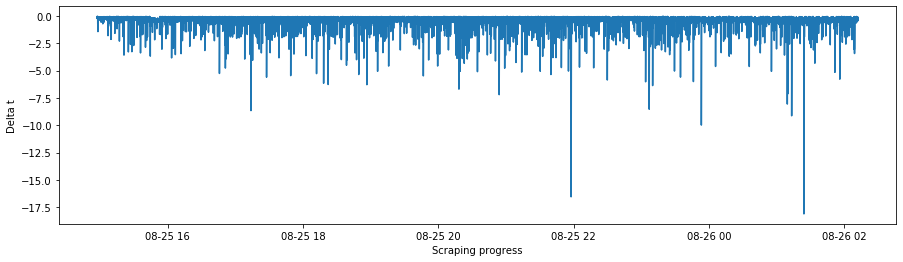

In [20]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_.dt,log_.delta_t) #.rolling(time=7).mean()
#ds['Evap_obs'].rolling(time=7).mean().plot()
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

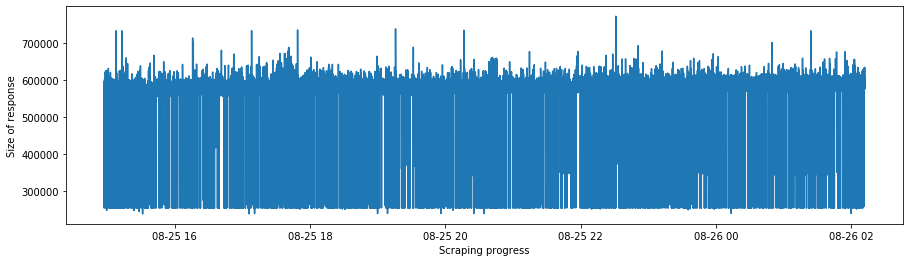

In [6]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_.dt,log_.response_size)

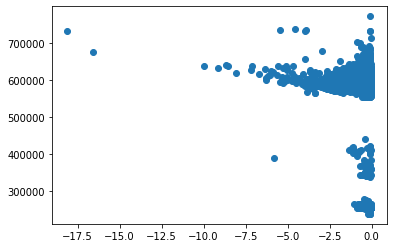

In [7]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_.delta_t,log_.response_size)

In [18]:
## Investigate errors
log_.success.value_counts() ## Count errors
## Groupby time
# round the time for aggregation
log_['dt_minute'] = log_.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_['dt_hour'] = log_.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
log_.groupby('dt_hour').success.mean()


dt_hour
2020-08-25 12:00:00.000000027    True
2020-08-25 12:00:00.000000099    True
2020-08-25 12:00:00.000000125    True
2020-08-25 12:00:00.000000129    True
2020-08-25 12:00:00.000000132    True
2020-08-25 12:00:00.000000151    True
2020-08-25 12:00:00.000000178    True
2020-08-25 12:00:00.000000207    True
2020-08-25 12:00:00.000000209    True
2020-08-25 12:00:00.000000215    True
2020-08-25 12:00:00.000000228    True
2020-08-25 12:00:00.000000229    True
2020-08-25 12:00:00.000000264    True
2020-08-25 12:00:00.000000271    True
2020-08-25 12:00:00.000000284    True
2020-08-25 12:00:00.000000288    True
2020-08-25 12:00:00.000000331    True
2020-08-25 12:00:00.000000369    True
2020-08-25 12:00:00.000000402    True
2020-08-25 12:00:00.000000419    True
2020-08-25 12:00:00.000000422    True
2020-08-25 12:00:00.000000426    True
2020-08-25 12:00:00.000000443    True
2020-08-25 12:00:00.000000450    True
2020-08-25 12:00:00.000000452    True
2020-08-25 12:00:00.000000453    True
2020